In [1]:
# Import the required libraries

import pandas as pd
import numpy as np

3. Outlier Handling - Detection / Removal / Imputation
\
We have already seen how to handle removing of rows/columns using drop().

In [ ]:
#1. Normal distribution example - remove using std. dev
data = np.random.normal(2500, 150, 1000)
print(np.min(data), np.max(data), np.mean(data), np.std(data))


2003.406167012919 2970.7669373001595 2507.4240165083984 152.1746099036075


In [ ]:
data = np.append(data, [1000000])
print(np.min(data), np.max(data), np.mean(data), np.std(data), np.median(data))

2003.406167012919 1000000.0 3503.9200964119864 31512.339983586422 2510.2994635758805


In [ ]:
def remove_outliers(data,n):
  mn = np.mean(data)
  sd = np.std(data)
  print('Old Mean and Std. Dev: ',mn,sd)

  filtered = [x for x in data if ((mn - n * sd) < x < (mn + n * sd))]
  print('New Mean and Std. Dev:', np.mean(filtered), np.std(filtered))
  return filtered

In [ ]:
newData = remove_outliers(data,3)

Old Mean and Std. Dev:  3498.367993195516 31512.50725544241
New Mean and Std. Dev: 2501.8663611887114 150.4444848377


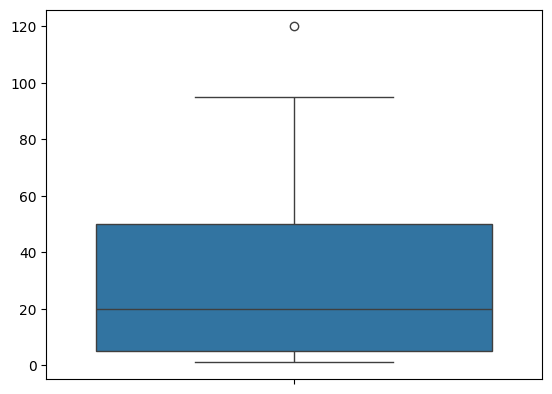

In [ ]:
#2. Box-Whisker plot/IQR
import seaborn as sns
data = [1,3,5,7,19, 20, 49,4, 50, 24, 85, 95,120]
sns.boxplot(data);

4. Data Transformation - Numerical Data

1. Min Max Scaler

In [2]:
data2 = pd.DataFrame({'Age': [20, 30, 25, 30, 45, 60, 44],
                     'Bonus': [10000, 30000, 25000, 27000, 44000, 50000, 49000],
                     'Experience': [1, 9, 5, 8, 10, 30, 20]
                     })
data2

,Age,Bonus,Experience
0,20,10000,1
1,30,30000,9
2,25,25000,5
3,30,27000,8
4,45,44000,10
5,60,50000,30
6,44,49000,20


In [3]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()


In [4]:
min_max

MinMaxScaler()

In [5]:
min_max.fit_transform(data2)

array([[0.        , 0.        , 0.        ],
       [0.25      , 0.5       , 0.27586207],
       [0.125     , 0.375     , 0.13793103],
       [0.25      , 0.425     , 0.24137931],
       [0.625     , 0.85      , 0.31034483],
       [1.        , 1.        , 1.        ],
       [0.6       , 0.975     , 0.65517241]])

In [9]:
data2.columns

Index(['Age', 'Bonus', 'Experience'], dtype='object')

In [10]:
scaled_data = min_max.fit_transform(data2)
#pd.DataFrame(scaled_data, columns=['Age','Bonus','Experience'])
pd.DataFrame(scaled_data, columns=data2.columns)

,Age,Bonus,Experience
0,0.000,0.000,0.000000
1,0.250,0.500,0.275862
2,0.125,0.375,0.137931
3,0.250,0.425,0.241379
4,0.625,0.850,0.310345
5,1.000,1.000,1.000000
6,0.600,0.975,0.655172


In [8]:
pd.DataFrame(scaled_data).agg(['min','max','mean', 'std'])

,0,1,2
min,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000
mean,0.407143,0.589286,0.374384
std,0.349021,0.368233,0.341030


2. Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
scaled = stdscaler.fit_transform(data2)
scaled

array([[-1.25999546, -1.72853067, -1.18576431],
       [-0.48631404, -0.26189859, -0.31204324],
       [-0.87315475, -0.62855661, -0.74890378],
       [-0.48631404, -0.4818934 , -0.42125837],
       [ 0.6742081 ,  0.76474387, -0.20282811],
       [ 1.83473024,  1.20473349,  1.98147457],
       [ 0.59683996,  1.13140189,  0.88932323]])

In [14]:
round(pd.DataFrame(scaled).agg(['min','max','mean', 'std']),3)

,0,1,2
min,-1.260,-1.729,-1.186
max,1.835,1.205,1.981
mean,0.000,-0.000,-0.000
std,1.080,1.080,1.080


3. Decimal Scaling

In [15]:
# Write a custom function for Decimal scaling.

def dec_scale(data):
    dec_scaled = pd.DataFrame()
    for d in data.columns:
        j = len(str(int(np.max(abs(data[d])))))   # get len(absolute max from each feature attribute)
        dec_scaled[d] = data[d] / (10 ** j)
    return dec_scaled

dec_scale(data2)

,Age,Bonus,Experience
0,0.20,0.10,0.01
1,0.30,0.30,0.09
2,0.25,0.25,0.05
3,0.30,0.27,0.08
4,0.45,0.44,0.10
5,0.60,0.50,0.30
6,0.44,0.49,0.20


4. Binning

In [16]:
weights = pd.DataFrame([89.2, 57.2, 63.4, 84.6, 90.2, 60.3, 88.7, 65.2, 79.6, 80.2, 93.5, 79.3, 72.5, 59.2, 77.2, 67.0, 88.2, 73.5])

from sklearn.preprocessing import KBinsDiscretizer
binning = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
bins = binning.fit(weights)

In [17]:
bins

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform',
                 subsample=None)

In [18]:
bins.bin_edges_

array([array([57.2 , 60.83, 64.46, 68.09, 71.72, 75.35, 78.98, 82.61, 86.24,
              89.87, 93.5 ])                                                ],
      dtype=object)

In [19]:
bins.transform(pd.DataFrame([54, 60, 61, 65, 100,52,72, 81, 95]))

array([[0.],
       [0.],
       [1.],
       [2.],
       [9.],
       [0.],
       [4.],
       [6.],
       [9.]])

In [ ]:
binning.inverse_transform(np.array([[0.],
       [9.],
       [0.],
       [6.],
       [0.]]))

array([[59.015],
       [91.685],
       [59.015],
       [80.795],
       [59.015]])

5. Data Transformation - Categorical Data

In [21]:
data3 = pd.DataFrame({'Age': [20, 30, 25, 30, 45, 60, 44],
                     'Bonus': [10000, 30000, 25000, 27000, 44000, 50000, 49000],
                     'Experience': [1, 9, 5, 8, 10, 30, 20],
                      'Job': ['Assistant', 'Lead', 'Assistant', 'Lead', 'Manager', 'Director','Manager']
                     })
data3

,Age,Bonus,Experience,Job
0,20,10000,1,Assistant
1,30,30000,9,Lead
2,25,25000,5,Assistant
3,30,27000,8,Lead
4,45,44000,10,Manager
5,60,50000,30,Director
6,44,49000,20,Manager


In [22]:
data3.Job.unique()

array(['Assistant', 'Lead', 'Manager', 'Director'], dtype=object)

In [23]:
pd.get_dummies(data3)

,Age,Bonus,Experience,Job_Assistant,Job_Director,Job_Lead,Job_Manager
0,20,10000,1,True,False,False,False
1,30,30000,9,False,False,True,False
2,25,25000,5,True,False,False,False
3,30,27000,8,False,False,True,False
4,45,44000,10,False,False,False,True
5,60,50000,30,False,True,False,False
6,44,49000,20,False,False,False,True


In [24]:
pd.get_dummies(data3, dtype=int)

,Age,Bonus,Experience,Job_Assistant,Job_Director,Job_Lead,Job_Manager
0,20,10000,1,1,0,0,0
1,30,30000,9,0,0,1,0
2,25,25000,5,1,0,0,0
3,30,27000,8,0,0,1,0
4,45,44000,10,0,0,0,1
5,60,50000,30,0,1,0,0
6,44,49000,20,0,0,0,1


In [25]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
result = enc.fit_transform(data3[['Job']])
result

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [26]:
enc.get_feature_names_out()

array(['Job_Assistant', 'Job_Director', 'Job_Lead', 'Job_Manager'],
      dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
encodedJob = enc.fit_transform(data3['Job'])

In [28]:
encodedJob

array([0, 2, 0, 2, 3, 1, 3])

In [29]:
data4 = pd.concat([data3, pd.Series(encodedJob)], axis='columns')
data4

,Age,Bonus,Experience,Job,0
0,20,10000,1,Assistant,0
1,30,30000,9,Lead,2
2,25,25000,5,Assistant,0
3,30,27000,8,Lead,2
4,45,44000,10,Manager,3
5,60,50000,30,Director,1
6,44,49000,20,Manager,3


In [30]:
enc.inverse_transform([0,1,2,3])

array(['Assistant', 'Director', 'Lead', 'Manager'], dtype=object)

Reference Links
1. https://github.com/dsmentors/Text_PreProcessing/blob/main/Text_Preprocessing.ipynb
2. https://medium.com/analytics-vidhya/how-to-remove-outliers-for-machine-learning-24620c4657e8
3. https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9
4. https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
